In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib.pyplot import plot,savefig
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import matplotlib.ticker as ticker
import os
import numpy as np
from scipy.optimize import curve_fit

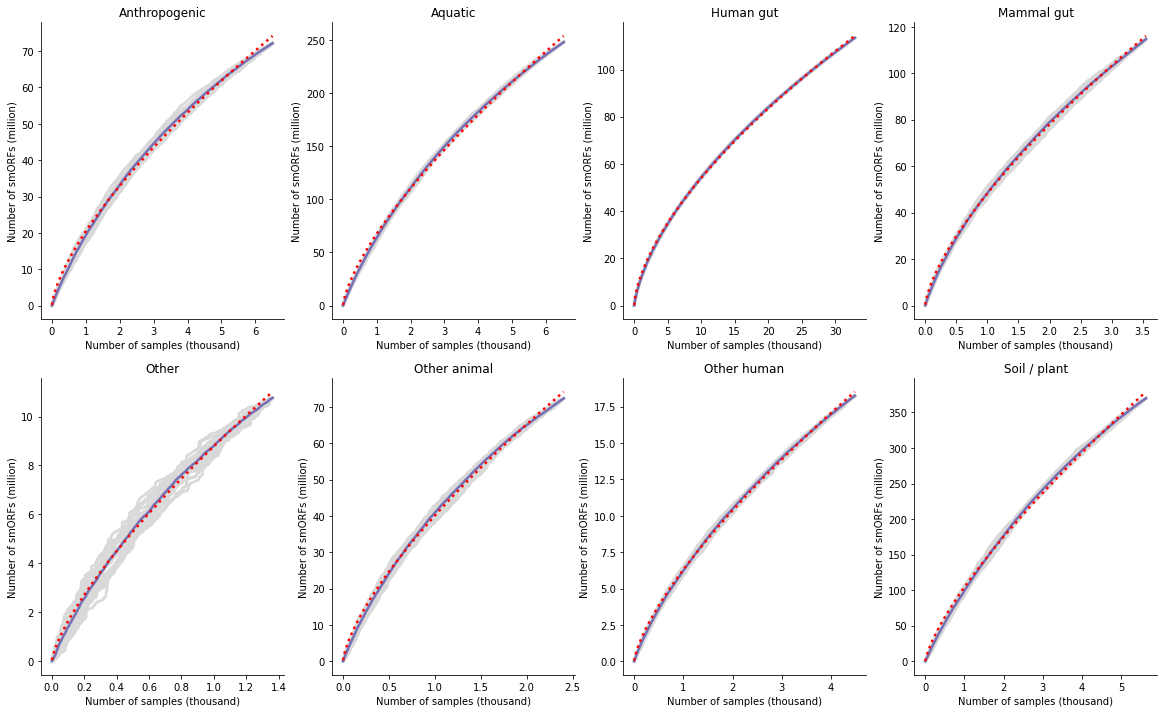

In [3]:
# Fit of Heap’s Law (N = k · sample^beta).
import numpy as np
from scipy.optimize import curve_fit

def func(x, k, b):
    return k * x**b

n_perms = 24

results_dir = './data/figure1/rarefaction_results/high/'
high_envs = os.listdir(results_dir)

fig, [(ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)] = plt.subplots(2,4,figsize=(20,12))
axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
n=0

for env in high_envs:
    for i in range(n_perms):
        df = pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t')
        df['smorfs'] = df['smorfs']/1e6
        df['k'] = df['k']/1e3
        xdata = np.array(df['k'])
        ydata = np.array(df['smorfs'])
        axlist[n].plot(xdata, ydata, color='#d9d9d9',linewidth=2.5)

    df_mean = pd.concat([pd.read_csv(results_dir + env + '/perm_' + str(i) + '.tsv', sep = '\t') for i in range(n_perms)]).groupby(level=0).mean()
    df_mean['smorfs'] = df_mean['smorfs']/1e6    
    df_mean['k'] = df_mean['k']/1e3
    xdata_mean = np.array(df_mean['k'])
    ydata_mean = np.array(df_mean['smorfs'])
    
    axlist[n].plot(xdata_mean, ydata_mean, color='#7570b3',linewidth=2.5)
    popt, pcov = curve_fit(func, xdata_mean, ydata_mean)
    axlist[n].plot(xdata_mean, func(xdata_mean, *popt), color='red',linestyle=":",linewidth=2.5)
    
    axlist[n].set_ylabel('Number of smORFs (million)')
    axlist[n].set_xlabel('Number of samples (thousand)') 
    axlist[n].set_title(env.replace('_', ' ').replace('-', ' / ').capitalize())
    axlist[n].spines['right'].set_visible(False)
    axlist[n].spines['top'].set_visible(False)
    
    n+=1